In [2]:
import math
import numpy as np
import codecs, json 
import cv2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import mixture
from scipy import linalg as la
from scipy import stats as st

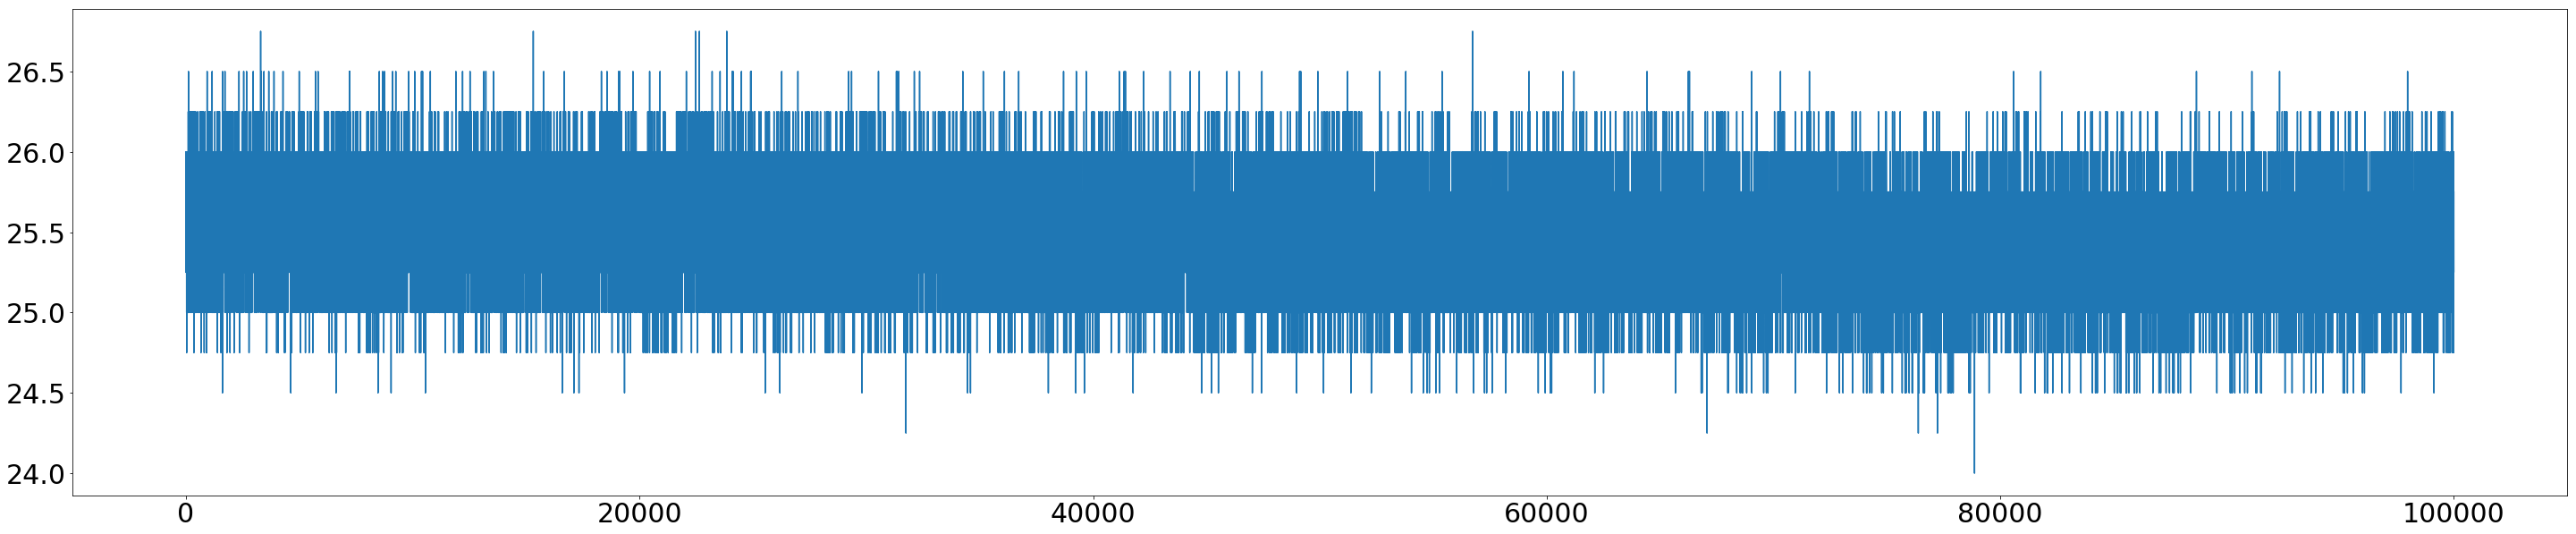

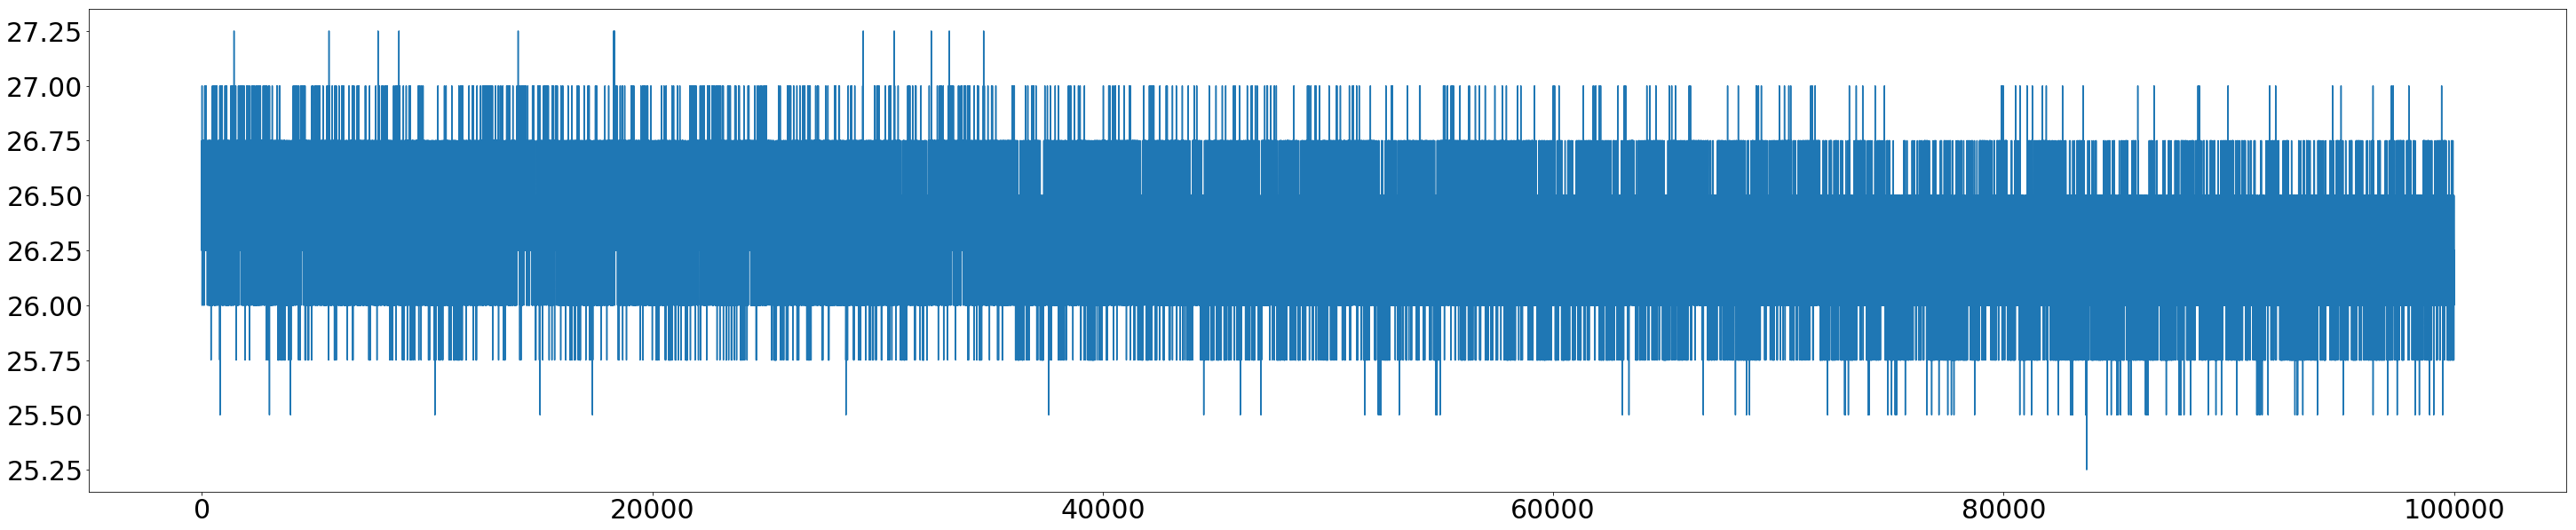

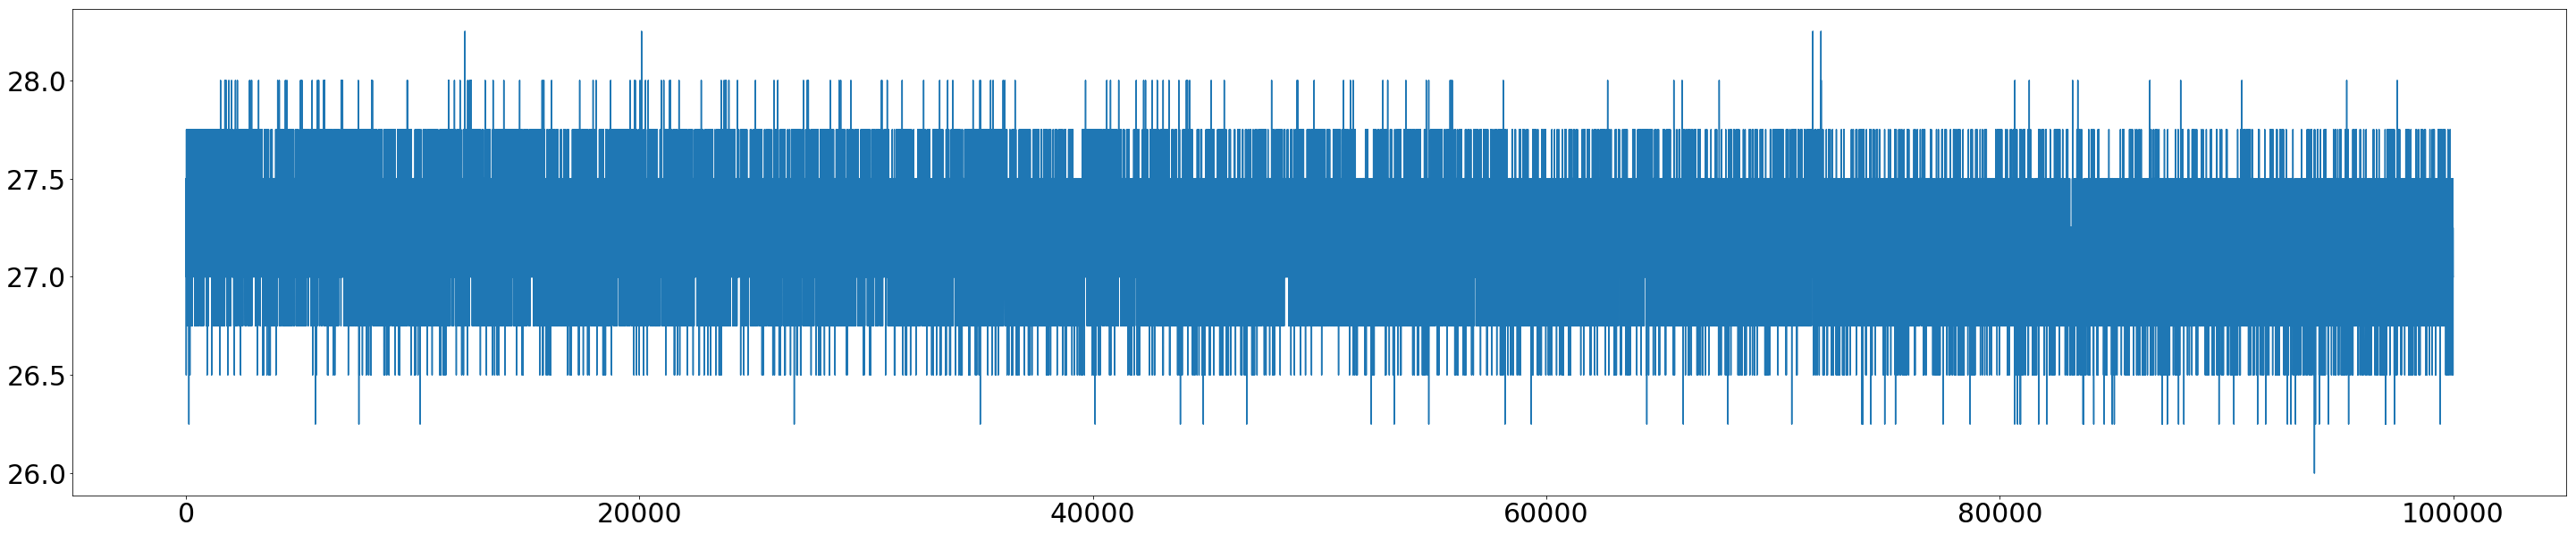

In [5]:
file_path = "8hours/1.json"
obj_text = codecs.open(file_path, 'r', encoding='utf-8').read()
arr_list= json.loads(obj_text)
arr = np.array(arr_list)


for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(arr[50000:150000,i,i])


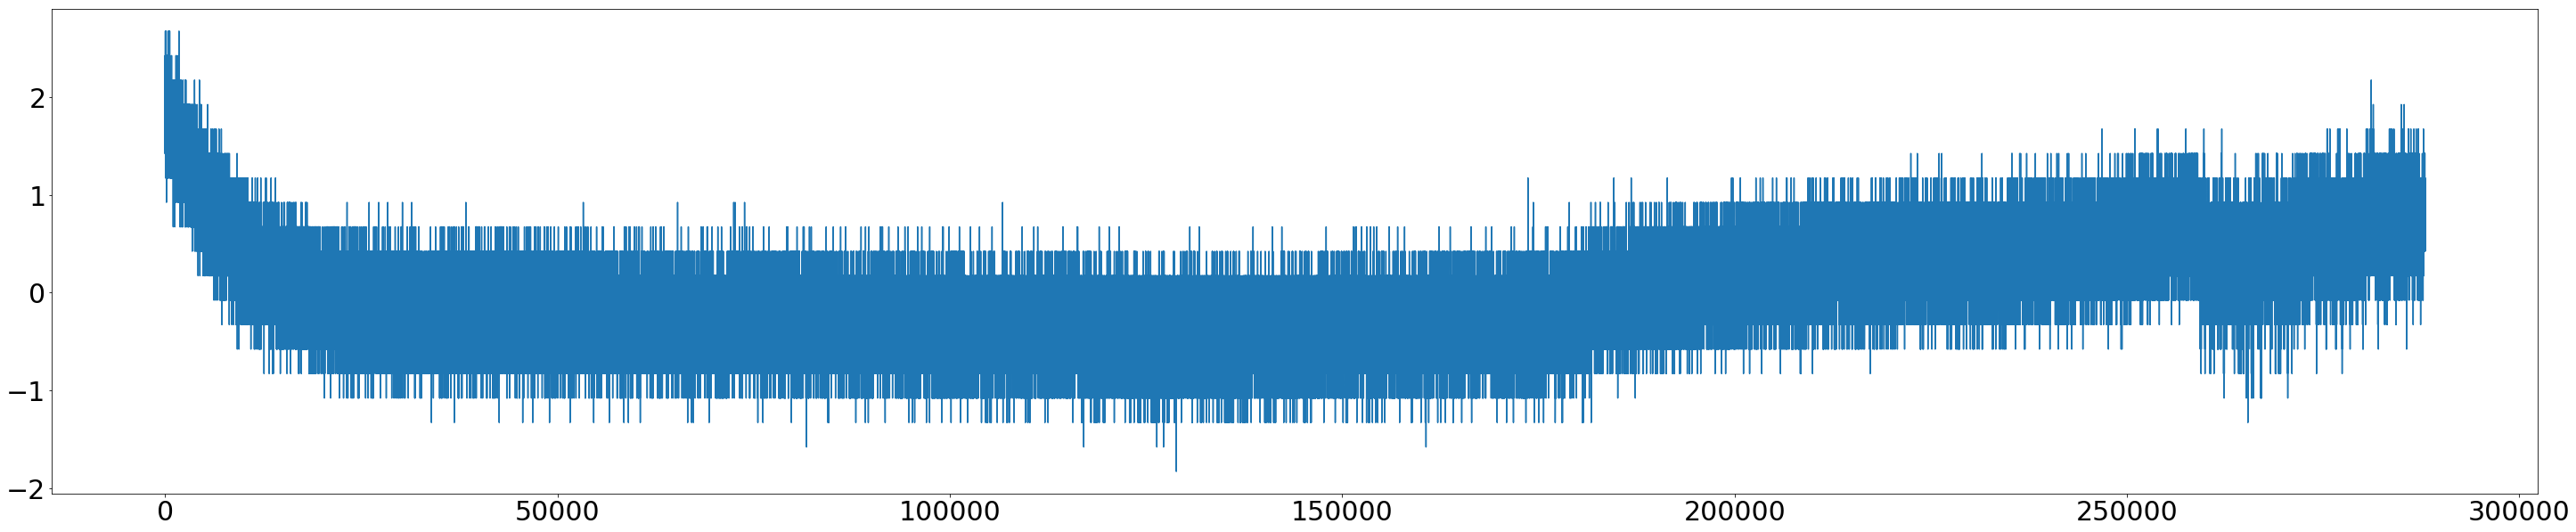

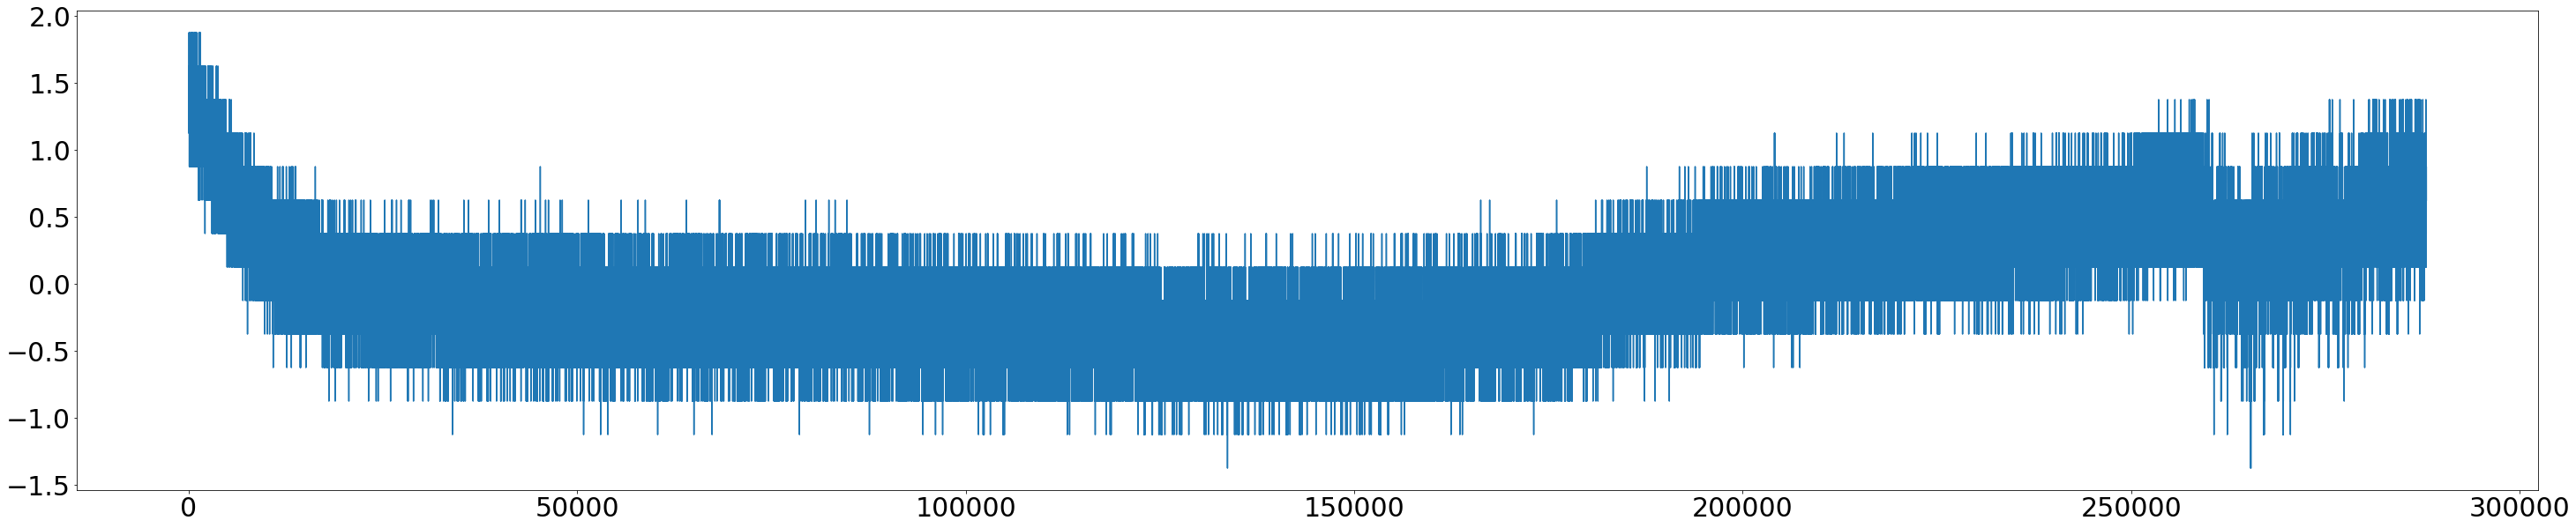

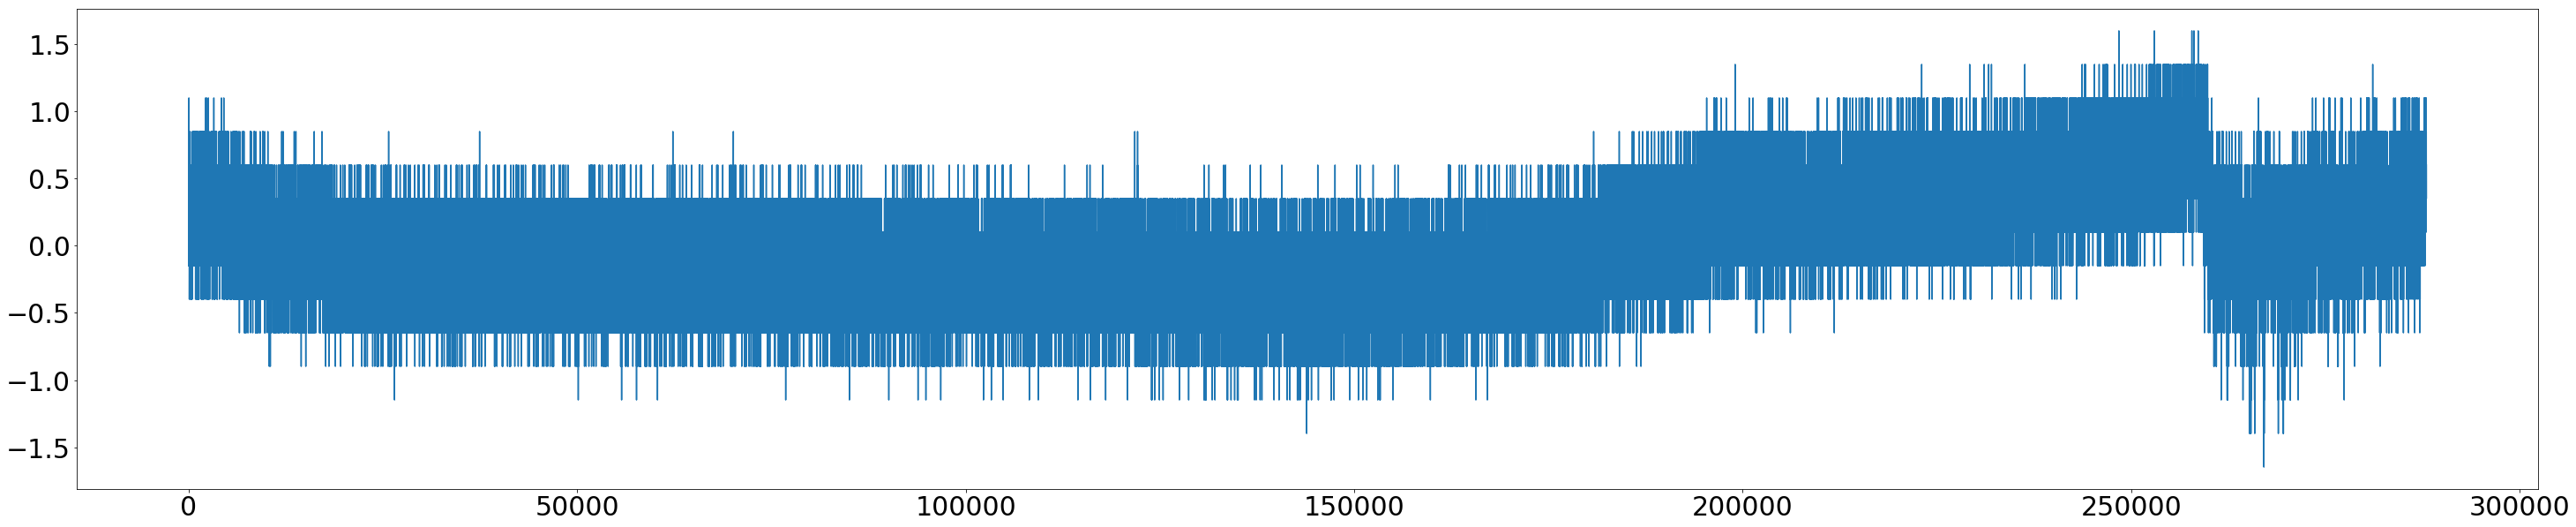

In [4]:
time_mean = np.mean(arr,axis = 0)
centralized = arr-time_mean.reshape(1,8,8)

for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(centralized[:,i,i])

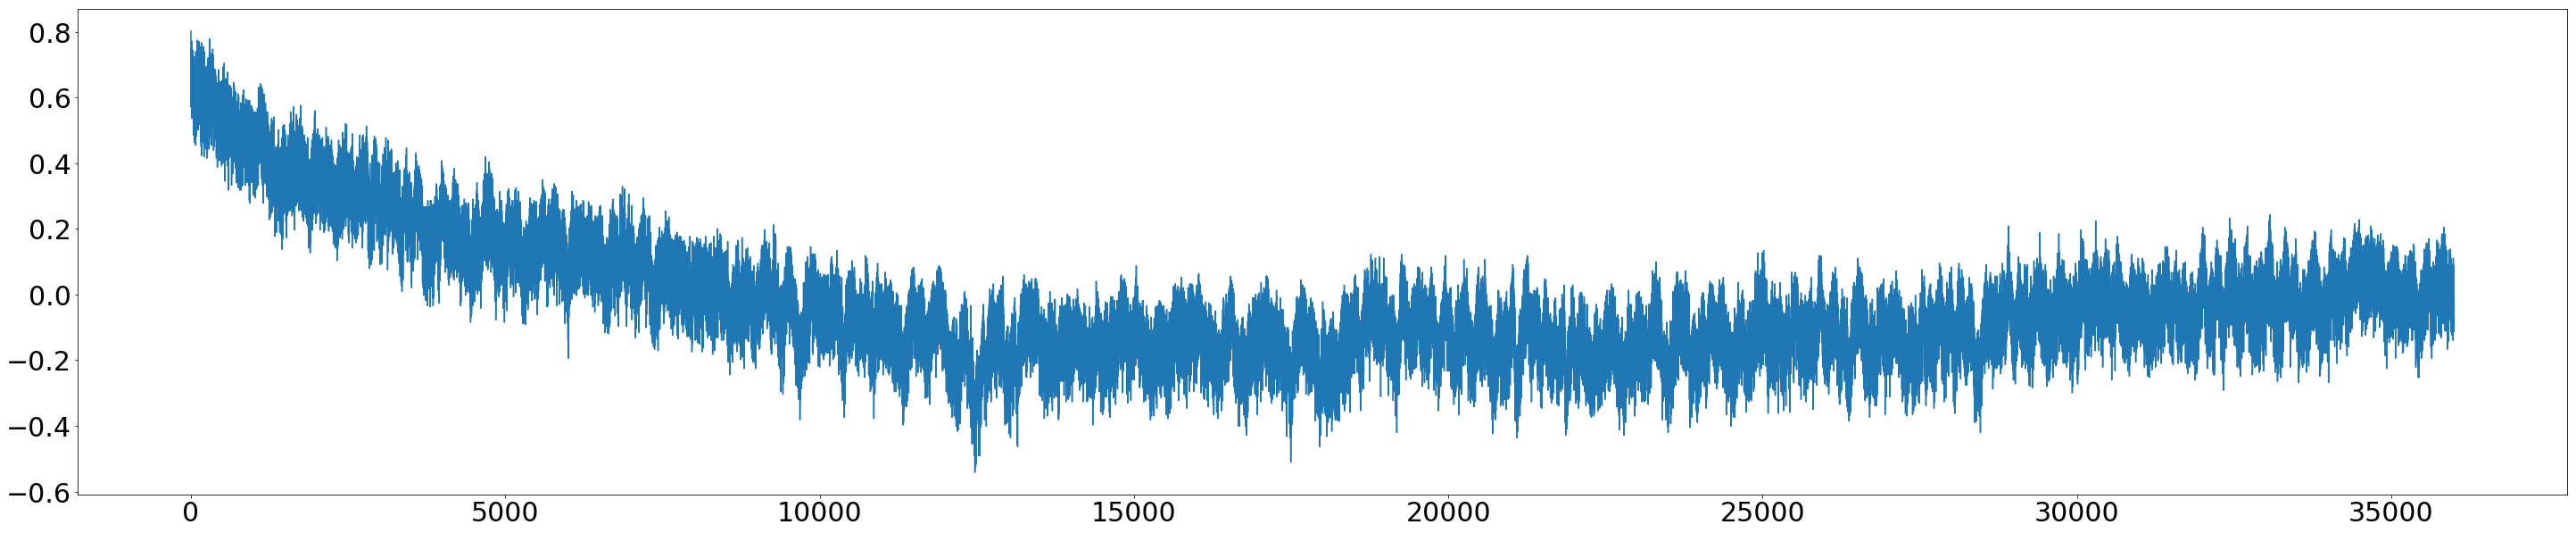

In [5]:
ambient_noise = np.mean(centralized, axis = (1,2))
plt.figure(figsize=(50, 10))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.plot(ambient_noise)
plt.show()

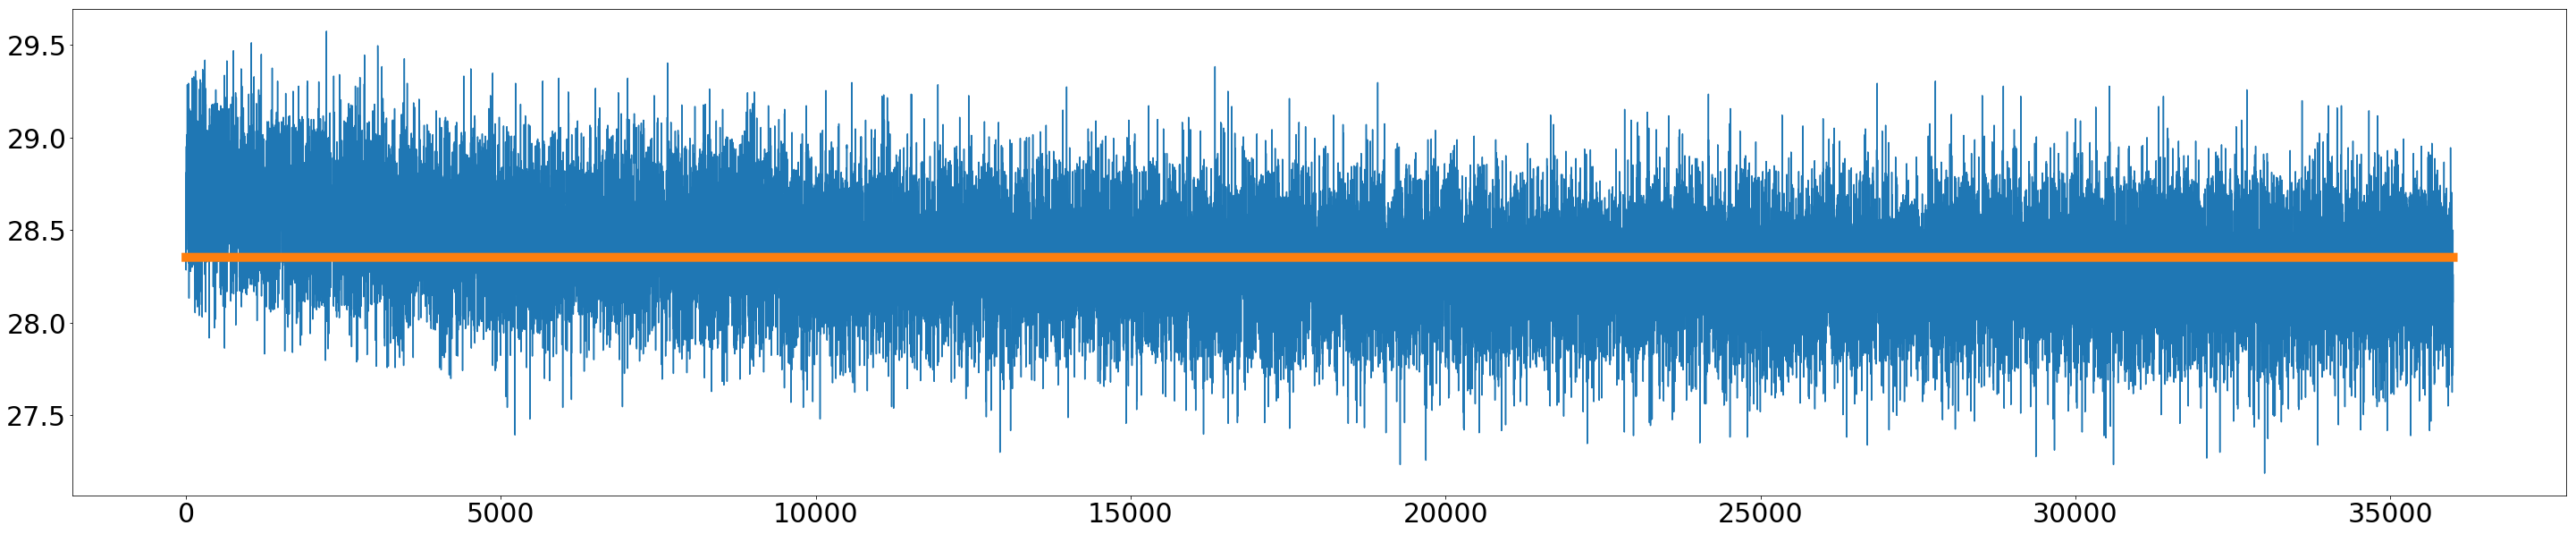

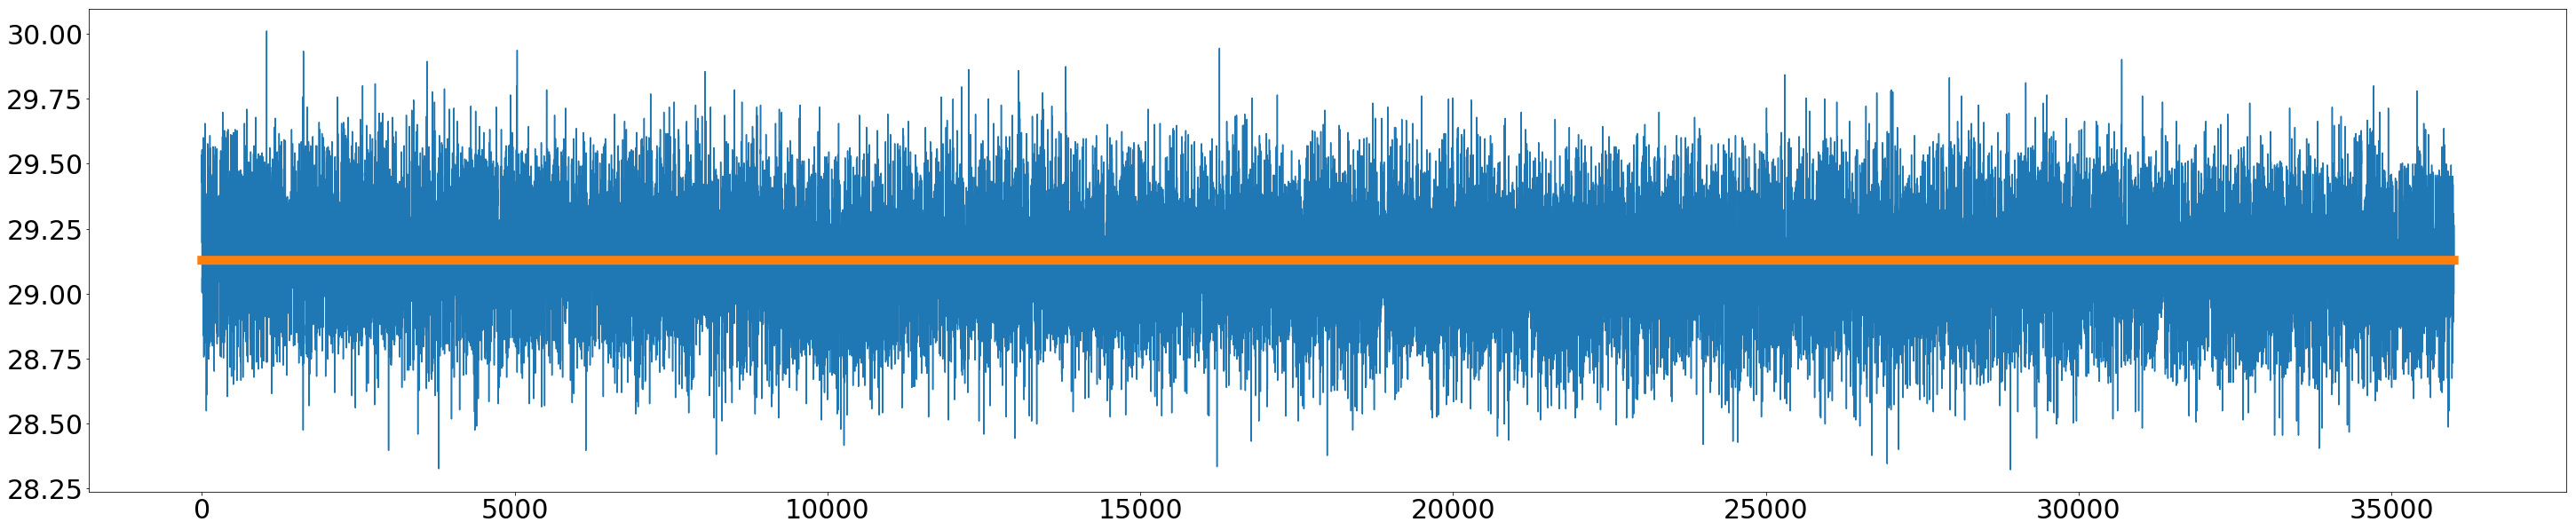

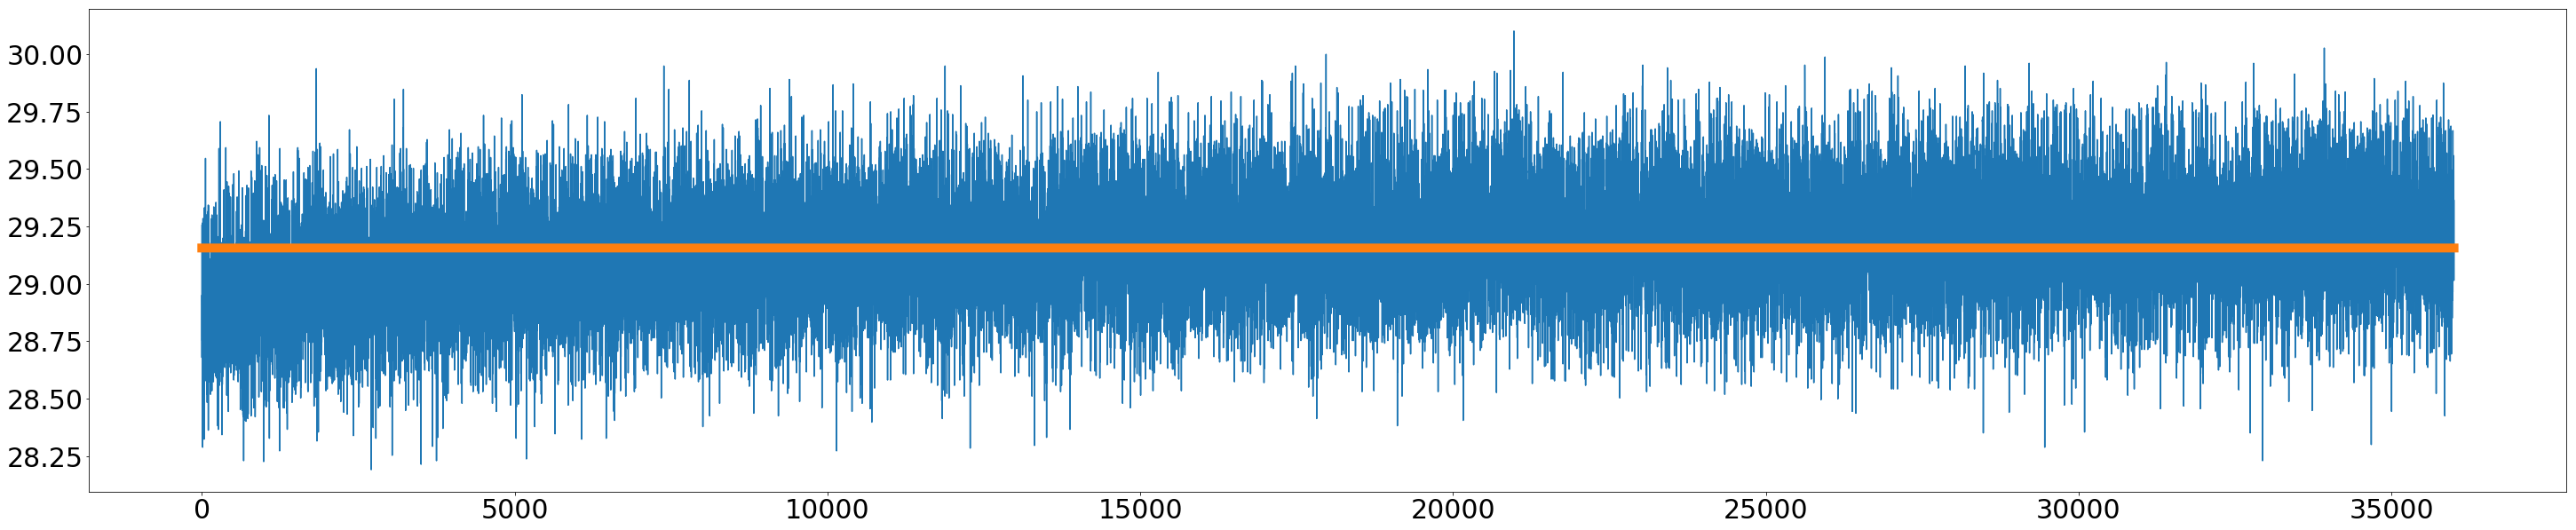

In [6]:
denoised = np.transpose(arr,(1,2,0))-ambient_noise
denoised = np.transpose(denoised,(2,0,1))
denoised_mean = np.mean(denoised,axis = 0)

for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(denoised[:,i,i])
    plt.plot(np.ones(36000)*denoised_mean[i,i], lw = 10)

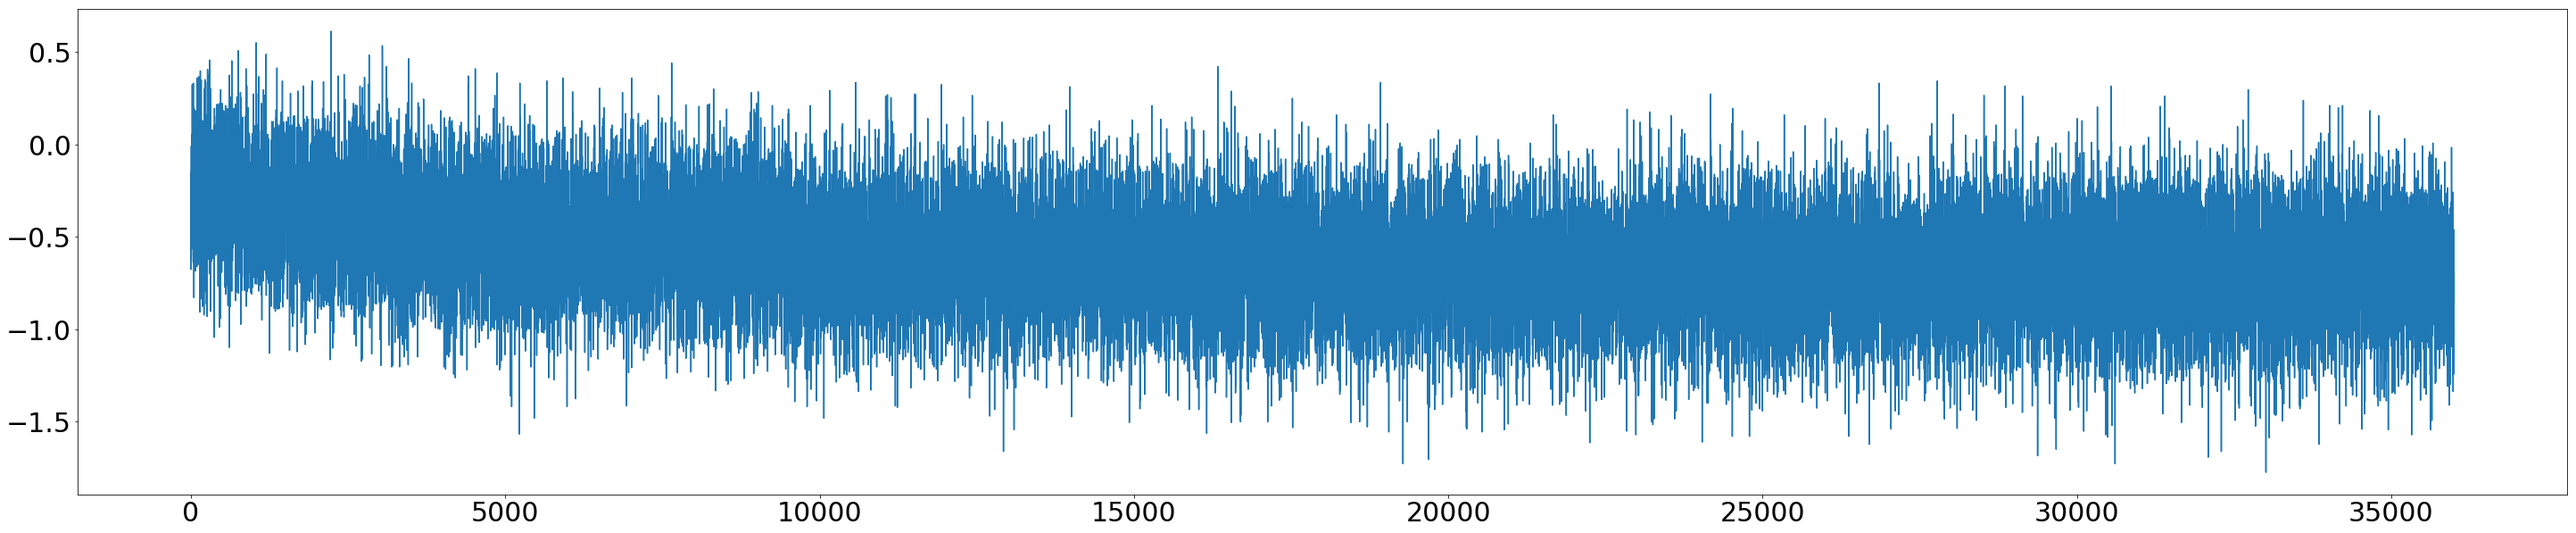

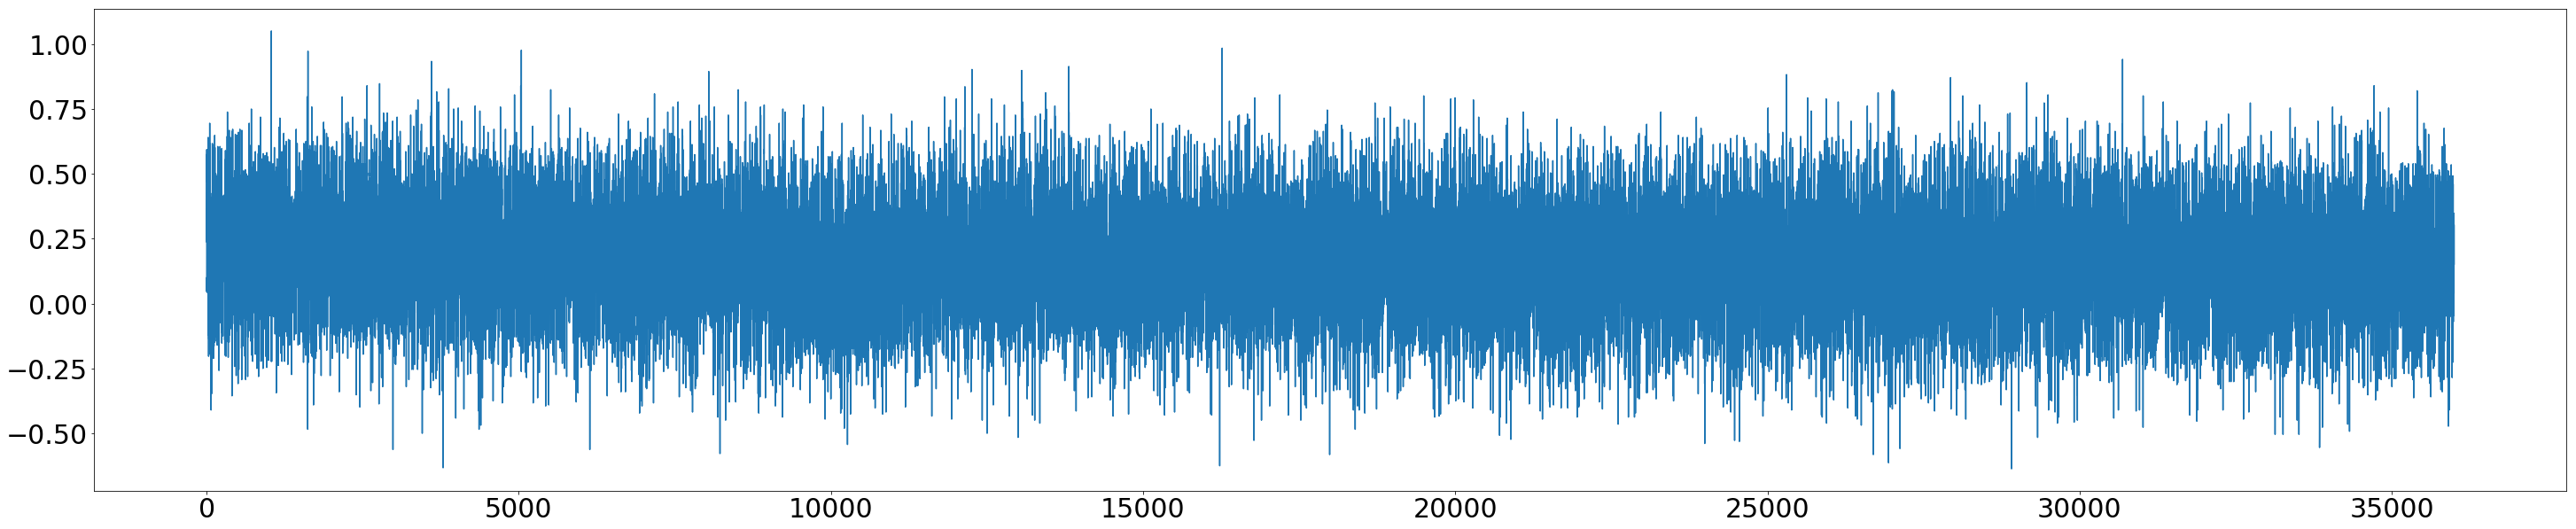

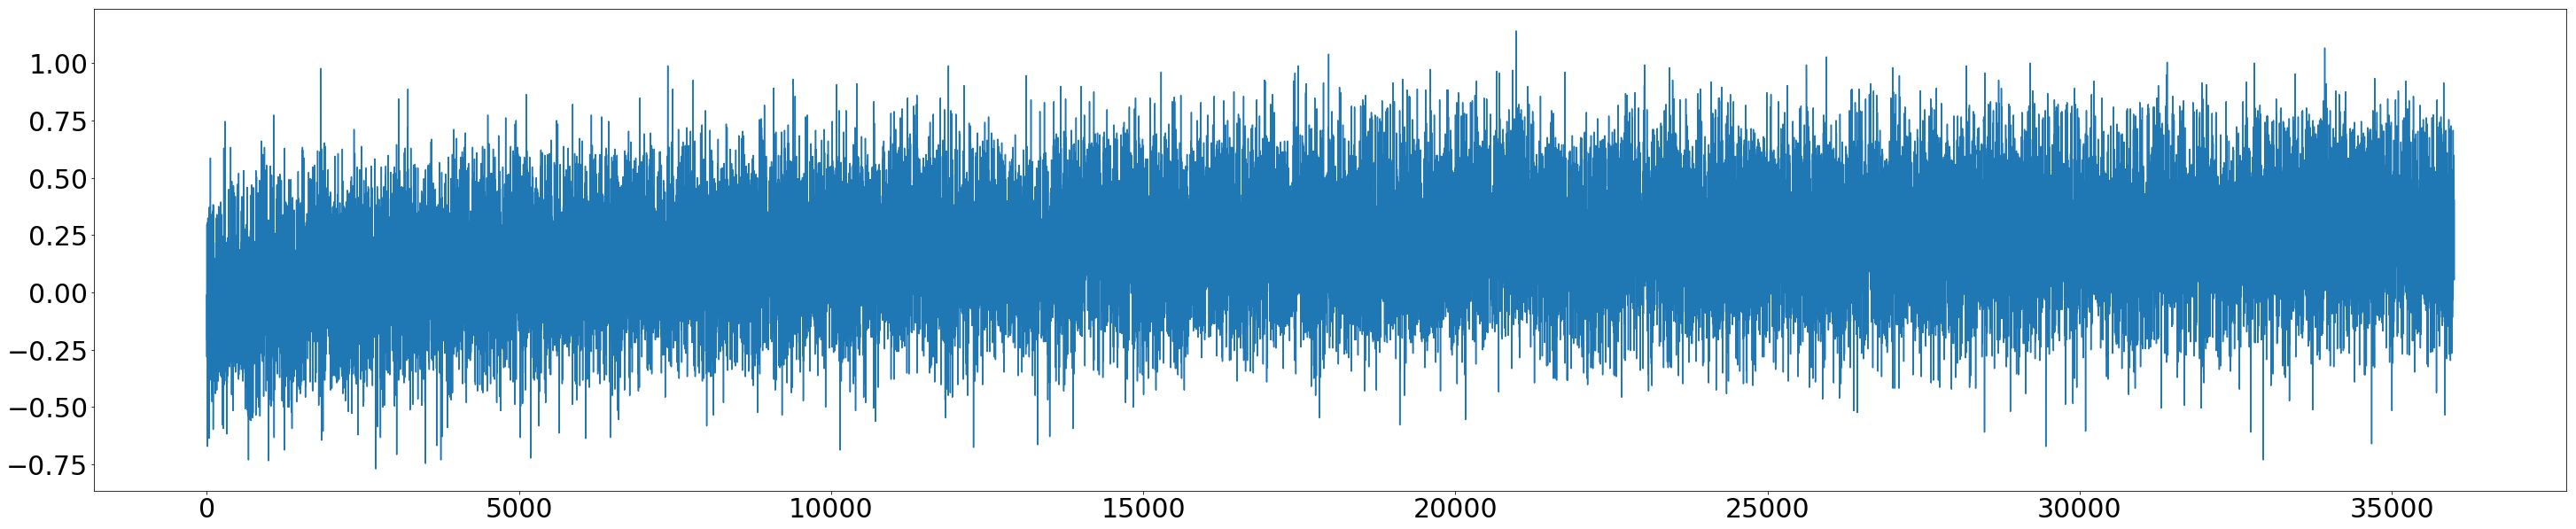

In [9]:
space_mean = np.mean(denoised, axis = (1,2))
spacial_central = denoised-time_mean.reshape(1,8,8)
spacial_central = np.transpose(denoised,(1,2,0))-space_mean
spacial_central = np.transpose(spacial_central,(2,0,1))

for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(spacial_central[:,i,i])

In [11]:
spacial_noise = np.mean(spacial_central, axis = 0)
spacial_noise.round(2)

array([[-0.61,  0.04, -0.04,  0.14,  0.04,  0.19,  0.41,  0.2 ],
       [-0.43,  0.02, -0.03,  0.12, -0.05,  0.1 ,  0.15,  0.05],
       [-0.37,  0.14, -0.09,  0.12,  0.09,  0.03,  0.11,  0.34],
       [-0.16,  0.01,  0.02,  0.17,  0.03,  0.06,  0.16, -0.02],
       [-0.35,  0.12, -0.07,  0.06,  0.25, -0.06,  0.06,  0.08],
       [-0.45, -0.23, -0.17,  0.1 ,  0.16,  0.24, -0.12,  0.24],
       [-0.53, -0.05,  0.08,  0.1 ,  0.2 ,  0.23,  0.2 ,  0.04],
       [-0.76, -0.37, -0.03,  0.1 ,  0.07, -0.12,  0.09, -0.02]])

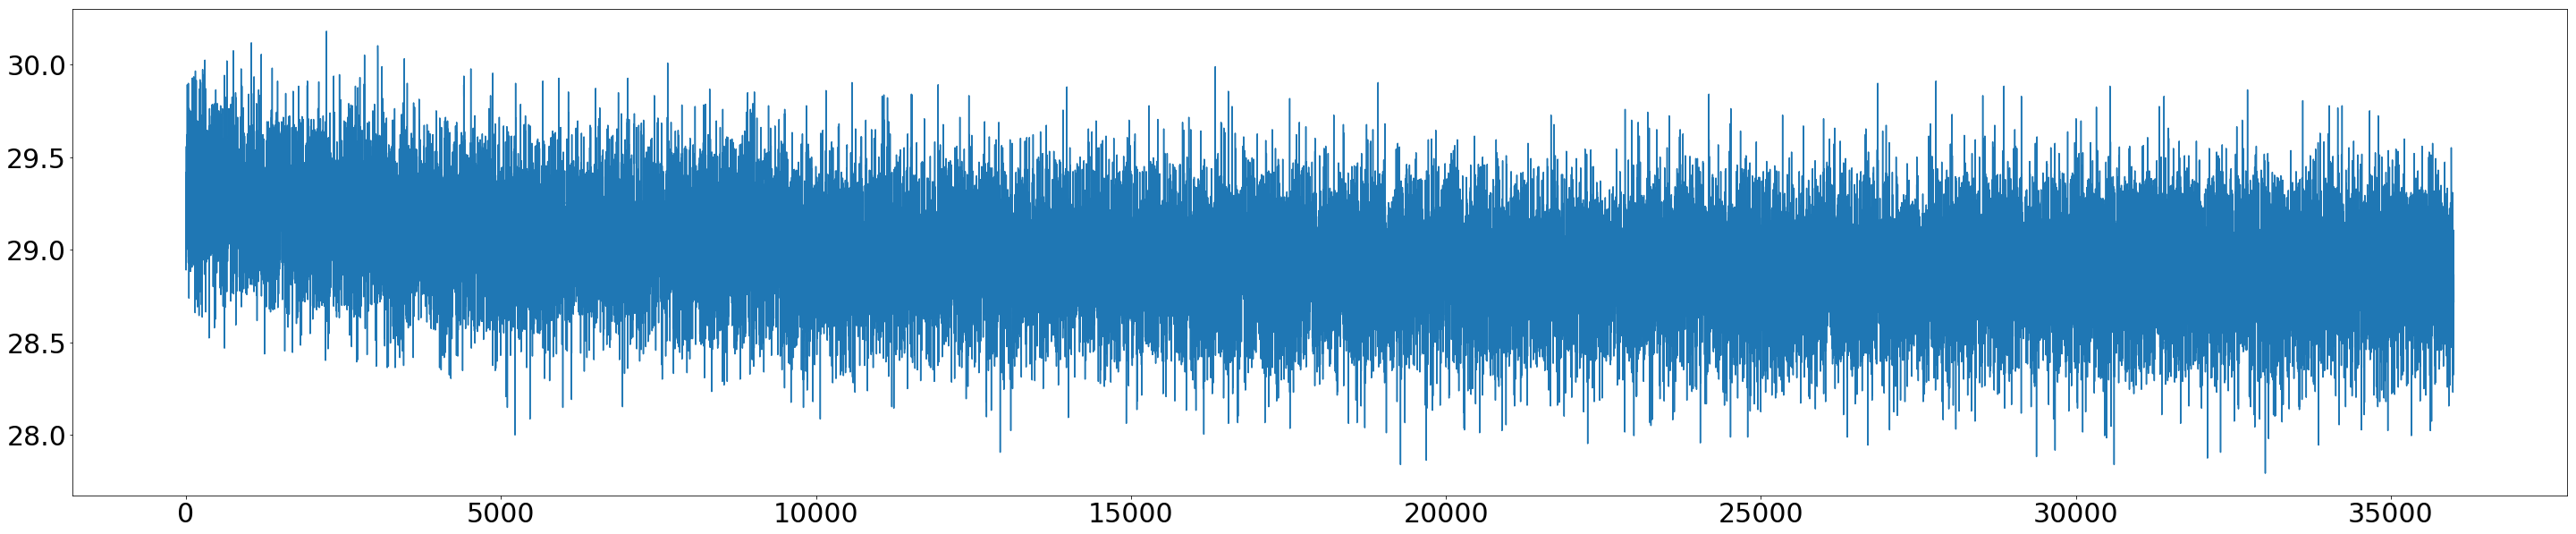

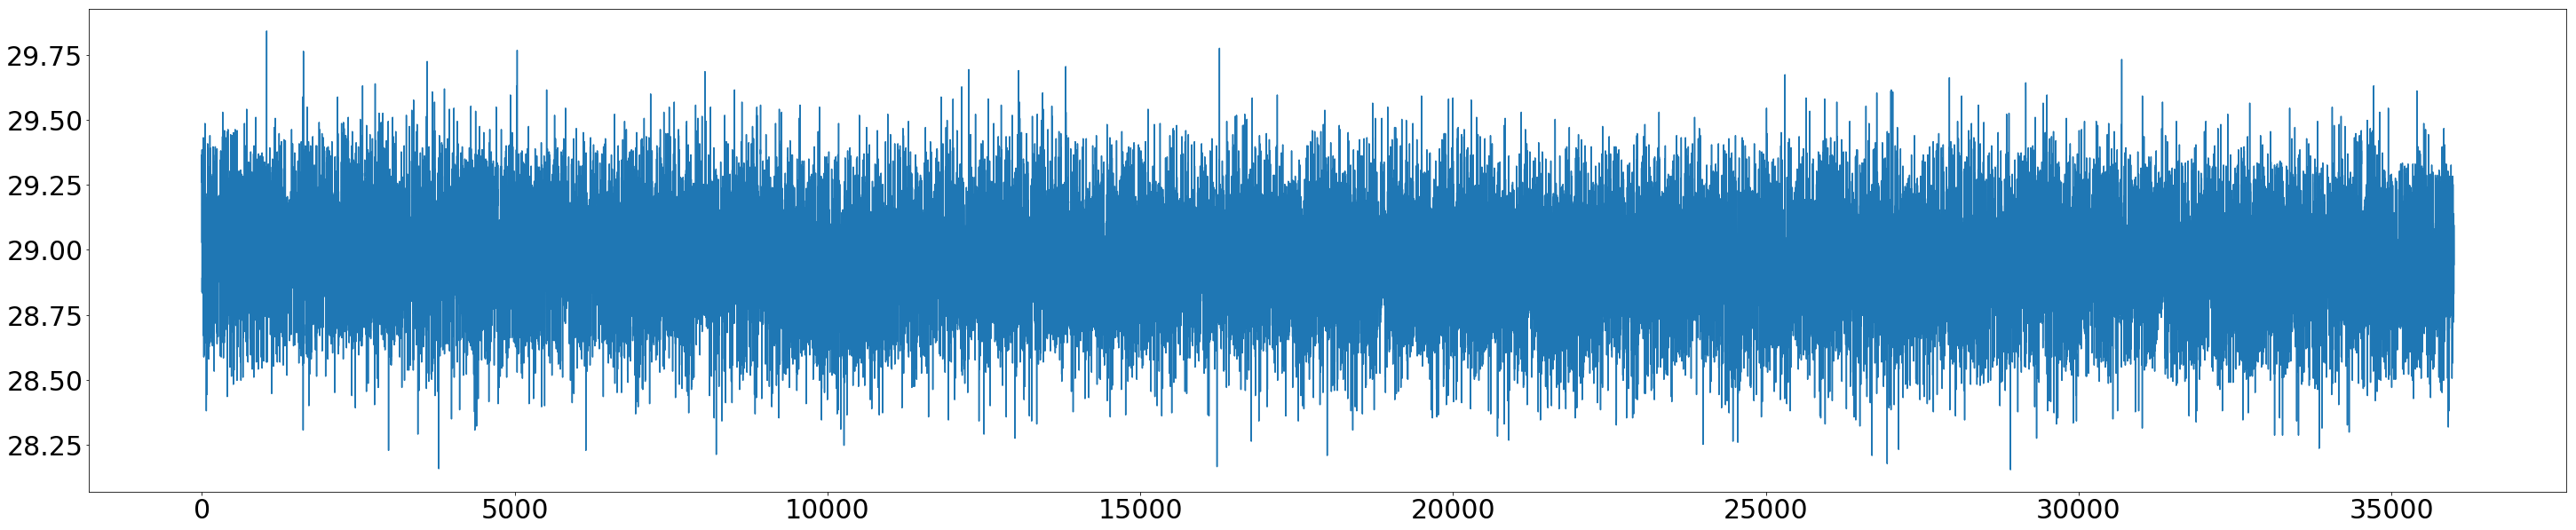

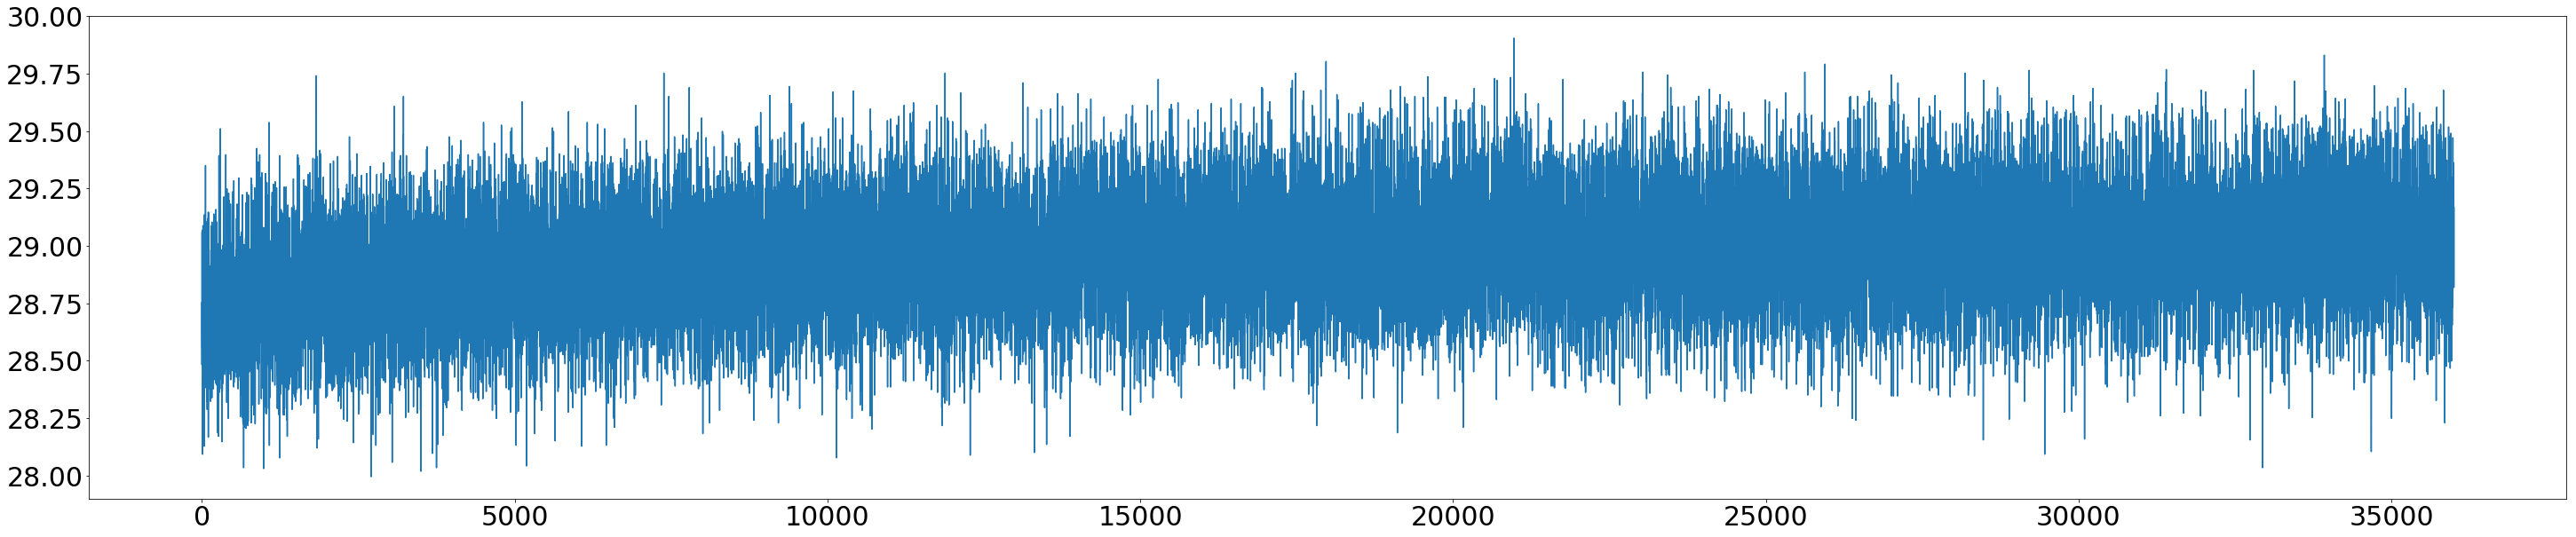

In [12]:
super_denoised = denoised-spacial_noise.reshape(1,8,8)

for i in range(0,8,3):
    plt.figure(figsize=(50, 10))
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.plot(super_denoised[:,i,i])

In [19]:
super_denoised[0].round(2)

array([[29.56, 29.4 , 29.49, 29.05, 29.16, 29.26, 29.28, 29.24],
       [29.12, 28.92, 29.23, 29.33, 29.25, 28.85, 28.8 , 28.9 ],
       [29.32, 29.06, 29.29, 29.08, 29.36, 29.16, 29.34, 28.86],
       [29.35, 28.94, 28.93, 29.03, 28.92, 29.14, 29.04, 28.96],
       [29.05, 29.08, 28.77, 28.89, 29.2 , 28.51, 28.39, 28.62],
       [29.15, 28.68, 28.87, 28.85, 28.54, 28.96, 28.82, 27.96],
       [28.48, 28.74, 28.86, 28.6 , 28.5 , 28.72, 28.75, 28.66],
       [28.96, 28.82, 29.23, 28.85, 28.88, 29.07, 29.11, 28.22]])

In [23]:
np.mean(super_denoised,axis = 0).round(2)

array([[28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96],
       [28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96, 28.96]])

In [15]:
denoised_mean.round(2)

array([[28.35, 29.  , 28.92, 29.1 , 29.  , 29.15, 29.37, 29.16],
       [28.53, 28.98, 28.93, 29.08, 28.91, 29.06, 29.11, 29.01],
       [28.59, 29.1 , 28.87, 29.08, 29.04, 28.99, 29.06, 29.3 ],
       [28.8 , 28.97, 28.98, 29.13, 28.98, 29.02, 29.12, 28.94],
       [28.61, 29.08, 28.89, 29.01, 29.21, 28.9 , 29.02, 29.04],
       [28.51, 28.73, 28.79, 29.06, 29.12, 29.2 , 28.84, 29.2 ],
       [28.43, 28.91, 29.04, 29.06, 29.16, 29.19, 29.16, 29.  ],
       [28.2 , 28.58, 28.93, 29.06, 29.03, 28.84, 29.05, 28.94]])

In [16]:
time_mean.round(2)

array([[28.35, 29.  , 28.92, 29.1 , 29.  , 29.15, 29.37, 29.16],
       [28.53, 28.98, 28.93, 29.08, 28.91, 29.06, 29.11, 29.01],
       [28.59, 29.1 , 28.87, 29.08, 29.04, 28.99, 29.06, 29.3 ],
       [28.8 , 28.97, 28.98, 29.13, 28.98, 29.02, 29.12, 28.94],
       [28.61, 29.08, 28.89, 29.01, 29.21, 28.9 , 29.02, 29.04],
       [28.51, 28.73, 28.79, 29.06, 29.12, 29.2 , 28.84, 29.2 ],
       [28.43, 28.91, 29.04, 29.06, 29.16, 29.19, 29.16, 29.  ],
       [28.2 , 28.58, 28.93, 29.06, 29.03, 28.84, 29.05, 28.94]])

In [20]:
np.array([[-0.61,  0.04, -0.04,  0.14,  0.04,  0.19,  0.41,  0.2 ],
       [-0.43,  0.02, -0.03,  0.12, -0.05,  0.1 ,  0.15,  0.05],
       [-0.37,  0.14, -0.09,  0.12,  0.09,  0.03,  0.11,  0.34],
       [-0.16,  0.01,  0.02,  0.17,  0.03,  0.06,  0.16, -0.02],
       [-0.35,  0.12, -0.07,  0.06,  0.25, -0.06,  0.06,  0.08],
       [-0.45, -0.23, -0.17,  0.1 ,  0.16,  0.24, -0.12,  0.24],
       [-0.53, -0.05,  0.08,  0.1 ,  0.2 ,  0.23,  0.2 ,  0.04],
       [-0.76, -0.37, -0.03,  0.1 ,  0.07, -0.12,  0.09, -0.02]])

array([[-0.61,  0.04, -0.04,  0.14,  0.04,  0.19,  0.41,  0.2 ],
       [-0.43,  0.02, -0.03,  0.12, -0.05,  0.1 ,  0.15,  0.05],
       [-0.37,  0.14, -0.09,  0.12,  0.09,  0.03,  0.11,  0.34],
       [-0.16,  0.01,  0.02,  0.17,  0.03,  0.06,  0.16, -0.02],
       [-0.35,  0.12, -0.07,  0.06,  0.25, -0.06,  0.06,  0.08],
       [-0.45, -0.23, -0.17,  0.1 ,  0.16,  0.24, -0.12,  0.24],
       [-0.53, -0.05,  0.08,  0.1 ,  0.2 ,  0.23,  0.2 ,  0.04],
       [-0.76, -0.37, -0.03,  0.1 ,  0.07, -0.12,  0.09, -0.02]])

In [22]:
np.sum(np.power(time_mean-np.mean(arr), 2))/64

0.048948344560599585

In [24]:
np.sum(np.power(np.mean(super_denoised,axis = 0)-np.mean(arr), 2))/64

2.107979793106158e-22

In [33]:
st.skew(arr[:,0,0])

0.5197330390427447

In [32]:
np.median(arr[:,0,0])

28.25

In [31]:
np.mean(super_denoised[:,0,0])

28.959572482638883